# Optimization method : Exterior Penalty Function - Augmented Lagrangian (Section 5.4.1 Martins, J. and Ning, A.)

Augmented Lagrangian function for equality constraints is

$\hat{f}(x; \lambda, \mu) = f(x) + \sum^{n_h}_{j=1} \lambda_j h_j (x) + \frac{\mu}{2} \sum^{n_h}_{j=1}h_j(x)^2$

The optimality conditions for the augmented Lagrangian:

$\nabla_x \hat{f} (x; \lambda, \mu) = \nabla f(x) + \sum^{n_h}_{j=1} (\lambda_j + \mu h_j(x)) \nabla h_j = 0$

The optimality conditions for the actual Lagrangian:

$\nabla_x \mathfrak{L}(x^*, \lambda^*) = \nabla f(x^*) + \sum^{n_h}_{j=1} \lambda_j^* \nabla h_j(x^*) = 0$

Comparing these two conditions

$\lambda^*_j \approx \lambda_j + \mu h_j$

Therefore, the update of the vector of Lagrange multipliers $\mathbf{\lambda}_{k+1}$ is based on the current estimate of the Lagrange multipliers $\mathbf{\lambda}_k$ and constraint values $\mathbf{h}(\mathbf{x}_k)$ using

$\lambda_{k+1} = \lambda_k + \mu_k h(x_k)$

This approach is an improvement on the plain quadratic penalty because updating the Lagrange multiplier estimates at each iteration allows for more accurate solutions without increasing $\mu$ as much. The quadratic penalty increases $\mu$ in the denominator to drive the constraints to zero ($h_j \approx \frac{\lambda_j^*}{\mu}$), while the augmented Lagrangian also controls the numerator through the Lagrange multiplier estimate. If the estimate is reasonably close to the true Lagrange multiplier, then the numerator becomes small for modest values of $\mu$. Thus, the augmented Lagrangian can provide a good solution for $x^*$ while avoiding the ill-conditioning issues of the quadratic penalty.

$h_j \approx \frac{1}{\mu} (\lambda^*_j - \lambda_j)$

One well-known approach for handling inequality constraints using the augmented Lagrangian approach is given by

$\hat{f}(x; \mu) = f(x) + \lambda^T \overline{g}(x) + \frac{\mu}{2} \| \overline{g}(x) \|^2_2$

where

$\overline{g}(x) \equiv \left\{\begin{array}{ll} h_j(x) & \text{for equality constraints} \\ g_j(x) & \text{if } g_j \geq -\lambda_j/\mu \\ -\lambda_j/\mu & \text{otherwise.} \end{array}\right.$

## For the unconstrained search: conjugated gradient + interval reduction method

1) Step size: Golden Search Method, employing the function "minimize_scalar" from scipy.optimize

2) Search direction : Conjugated Gradient, $\mathbf{d}_{(t)} = -\nabla_{\mathbf{x}} f_{(t)} + \beta_{(t)}\mathbf{d}_{(t-1)}$, onde $\beta_{(t)}=\left[\frac{||\nabla_{\mathbf{x}} f_{(t)}||}{||\nabla_{\mathbf{x}} f_{(t-1)}||}\right]^2$ 

The first step consists in defining the algorithms parameters, such as initial point $\mathbf{x}_{(0)}$, $\alpha_{(t)}$ and convergence tolerance constant $\epsilon_{\nabla}$, as well as the function to be minimized and its gradient evaluation:



# Import necessary libraries

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
%matplotlib widget

# Set parameters (user has to define)

#### Problem and initial guess

In [2]:
# 1 = Example 5.4, P. 170 (Joaquim R. R. A. Martins, Andrew Ning - Engineering Design Optimization (2021))
# 2 = Example 4.27, P. 122 (Jasbir S. Arora - Introduction to optimum design (2004))
# 3 = Example 4.31, P. 134 (Jasbir S. Arora - Introduction to optimum design (2004))
# 4 = Example 5.6, P. 183 (Jasbir S. Arora - Introduction to optimum design (2004))
problem = 2

# Initial guess
x = np.array([1.0, 1.5])

#### Define the method of optimization

In [3]:
# 1 = Quadratic penalty
# 2 = Augmented Lagrangian
method = 2

#### Initial value for penalization ($\mu$) and rate of increase ($\rho$)

In [4]:
mu = 0.5
rho = 1.1

#### Stopping criterias for the exterior penalty method

In [5]:
itmax = 20 # Maximum number of iterations
epsilon1 = 1e-3 # Magnitude of the penalty terms
epsilon2 = 1e-3 # Change in value of the penalized objective function

#### Upper bound ($\alpha$) for the Golden Search Algorithm and convergence of Conjugate Gradient

In [6]:
alpha0 = 1.0
TolG = 1e-5

# Get the problem and method

In [7]:
match problem:
    # Problem 1 - Example 5.4, P. 170 (Joaquim R. R. A. Martins, Andrew Ning - Engineering Design Optimization (2021))
    case 1:
        # Objective function
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([x[0] + 2*x[1]]),
            'jac' : lambda x : np.array([1, 2])
        }
        
        # Equality constraints
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([]),
            'jac' : lambda x: np.array([])
            }
        
        # Inequality constraints
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([1/4*x[0]**2 + x[1]**2 - 1]),
            'jac' : lambda x: np.array([1/2*x[0], 2*x[1]])
            }
    
    # Problem 2 - Example 4.27, P. 122 (Jasbir S. Arora - Introduction to optimum design (2004))
    case 2:
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([(x[0]-1.5)**2 + (x[1]-1.5)**2]),
            'jac' : lambda x : np.array([2*(x[0]-1.5), 2*(x[1]-1.5)])
        }
        
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([x[0] + x[1] - 2]),
            'jac' : lambda x: np.array([1, 1])
            }
        
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([]),
            'jac' : lambda x: np.array([])
            }
    
    # Problem 3 - Example 4.31, P. 134 (Jasbir S. Arora - Introduction to optimum design (2004))
    case 3:
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([x[0]**2 + x[1]**2 - 3*x[0]*x[1]]),
            'jac' : lambda x : np.array([2*x[0] - 3*x[1], 2*x[1] - 3*x[0]])
        }
        
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([]),
            'jac' : lambda x: np.array([])
            }
        
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([x[0]**2 + x[1]**2 - 6]),
            'jac' : lambda x: np.array([2*x[0], 2*x[1]])
            }
    
    # Problem 4 - Example 5.6, P. 183 (Jasbir S. Arora - Introduction to optimum design (2004))
    case 4:
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([x[0]**2 + x[1]**2 - 2*x[0] - 2*x[1] + 2]),
            'jac' : lambda x : np.array([2*x[0] - 2, 2*x[1] - 2])
        }
        
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([]),
            'jac' : lambda x: np.array([])
            }
        
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([-2*x[0] - x[1] + 4, -x[0] - 2*x[1] + 4]),
            'jac' : lambda x: np.array([
                [-2, -1],
                [-1, -2]
            ])
            }
    
    # Problem 5 - Example 5.1, P. 176 (Jasbir S. Arora - Introduction to optimum design (2004))
    case 5:
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([(x[0] - 10)**2 + (x[1] - 8)**2]),
            'jac' : lambda x : np.array([2*x[0] - 20, 2*x[1] - 16])
        }
        
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([]),
            'jac' : lambda x: np.array([])
            }
        
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([x[0] + x[1] - 12, x[0] - 8]),
            'jac' : lambda x: np.array([
                [1, 1],
                [1, 0]
            ])
            }
    
    # Problem 6 - Example 10.6, P. 359 (Jasbir S. Arora - Introduction to optimum design (2004))
    case 6:
        obj_fun = {
            'type': 'obj',
            'fun' : lambda x : np.array([
                2*x[0]**3 + 15*x[1]**2 - 8*x[0]*x[1] - 4*x[0]
                ]),
            'jac' : lambda x : np.array([
                6*x[0]**2 - 8*x[1] - 4, 30*x[1] - 8*x[0]
                ])
        }
        
        eq_cons = {
            'type': 'eq',
            'fun' : lambda x: np.array([x[0]**2 + x[0]*x[1] + 1]),
            'jac' : lambda x: np.array([2*x[0] + x[1], x[0]])
            }
        
        ineq_cons = {
            'type': 'ineq',
            'fun' : lambda x: np.array([x[0] - 1/4*x[1]**2 - 1]),
            'jac' : lambda x: np.array([1, 1/2*x[1]])
            }


In [8]:
def get_values(x):
    """Get the values of the objective function,
    equality constraints, inequality constraints
    and all its gradients

    Args:
        x (numpy array): point (x1, x2)

    Returns:
        values of gradients
    """
    
    f, df = obj_fun['fun'](x), obj_fun['jac'](x)
    h, dh = eq_cons['fun'](x), eq_cons['jac'](x)
    g, dg = ineq_cons['fun'](x), ineq_cons['jac'](x)
    
    return f, df, h, dh, g, dg

# Set initial Lagrange multipliers
f, _, h, _, g, _ = get_values(np.array([0, 0]))

lambda_eq = np.zeros((h.size))
lambda_ineq = np.zeros((g.size))

In [9]:
match method:
    case 1:
        method = 'Quadratic Penalty'
        def phi(x):
            f, df, h, dh, g, dg = get_values(x)
            
            auxg = np.maximum(0, g)
            ph = f + mu*(h.sum()**2 + auxg.sum()**2)
            
            # Construction of the gradient of phi: contribution of the inequality constraints (g_i)
            dgaux = np.array(np.zeros(x.shape))
            if g.size == 1:  # split into two situations: with only one constraints, and more constraints
                dgaux = dg*np.maximum(0, g)
            else:
                for i in range(g.size):
                    dgaux = dgaux + dg[i, :]*np.maximum(0, g[i])
                
            # Construction of the gradient of phi: contribution of the equality constraints (h_j)
            dhaux = np.array(np.zeros(x.shape))
            if h.size == 1:  # split into two situations: with only one constraints, and more constraints
                dhaux = dh*h
            else:
                for j in range(h.size):
                    dhaux = dhaux + dh[j, :]*h[j]
            
            # Gradient of phi:
            dph = df + 2*mu*(dhaux + dgaux)
            
            return ph, dph
    
    case 2:
        method = 'Augmented Lagrangian'
        def phi(x):
            f, df, h, dh, g, dg = get_values(x)
            
            ghat = np.copy(g)
            for i in range(g.size):
                c = -lambda_ineq[i]/mu
                if g[i] < c:
                    ghat[i] = c

            # maxg = np.max(0, ghat)
            L = f + np.dot(lambda_eq, h) + np.dot(lambda_ineq, ghat) + mu/2 * (np.dot(h, h) + np.dot(ghat, ghat))
            
            # transform in matrix
            if dh.size > 0 and len(dh.shape) == 1:
                dh = np.array([dh])
                
            if dg.size > 0 and len(dg.shape) == 1:
                dg = np.array([dg])
                
            dL = df + np.matmul(lambda_eq, dh) + np.matmul(lambda_ineq, dg) + mu*(np.matmul(h, dh) + np.matmul(g, dg))
            
            return L, dL

# Optimize

### Conjugate Gradient + Golden Search

In [10]:
def f_alpha(alpha, args):
    """Definition of the equation to be minimized as function of the step size alpha

    Args:
        alpha (float): step size
        args (array): array with arguments point (x) and direction of search (d)

    Returns:
        f (float): value of phi
    """
    x, d = args[0], args[1]
    
    xt = x + alpha*d
    f, _ = phi(xt)
    
    return f

In [11]:
def CG_GS(x, alpha0, TolG):
    # Count variable
    t = 0
    # f and df values at the initial point
    [f, df] = phi(x)
    dftm1 = df
    
    xs = [x]
    fs = [f]
        
    while np.sqrt(df @ df) > TolG:
        # Search direction: Conjugated Gradient
        beta = (np.linalg.norm(df)/np.linalg.norm(dftm1))**2
 
        if t == 0:
            d = -df
        else:
            d = -df + beta*dtm1
            
        # Step determination: Golden Search (method='golden'), Brent (method='brent') or Bounded (method='bounded')
        alpha = minimize_scalar(f_alpha, bounds=(.001, alpha0), args=([x, d]), method='bounded')

        # Update the current point
        xt = x + alpha.x*d
        xs.append(xt)
        
        # Saves information of gradient and descent direction of current iteration
        dftm1 = df
        dtm1 = d
    
        # Evaluate the objective function and gradient at the new point
        [f, df] = phi(xt)
        fs.append(f)
    
        # Update the design variable and iteration number
        x = xt
        t = t + 1
    
    return x, f, df, t, xs, fs

### Exterior penalty

In [12]:
k, stop_1, stop_2 = 0, 1.0, 1.0 # for stopping criteria
cost_f, cost_g = 0, 0 # costs

f = obj_fun['fun'](x)
points = np.array([x])
values = np.array([f])

while k < itmax and stop_1 > epsilon1 and stop_2 > epsilon2:
    # Conjugate gradient + Golden search method
    xt, f, df, t, xs, fs = CG_GS(x, alpha0, TolG) # minimize
    
    # Check convergence
    fopt, _, h, dh, g, dg = get_values(xt)
    stop_1 = abs((f - fopt)/fopt)
    
    if k > 0:
        stop_2 = abs((f - f_old)/f)
        
    f_old = f
        
    points = np.concatenate((points, xs))
    values = np.concatenate((values, fs))
    
    k = k + 1
    
    if k >= itmax:
        print('Stopped due to the number of iterations')
    elif stop_1 <= epsilon1:
        print('Stopped due to the small magnitude of the penalty terms')
    elif stop_2 <= epsilon2:
        print('Stopped due to a small change in value of the penalized objective function')
        
    # Update Lagrange multiplier, penalty parameter and starting point
    lambda_eq = lambda_eq + mu*h
    lambda_ineq = lambda_ineq + mu*g
    mu = mu*rho
    x = xt
    
    # Update cost
    cost_f += t
    cost_g += t

Stopped due to a small change in value of the penalized objective function


## Print results

In [13]:
fopt, dfopt, hopt, dhopt, gopt, dgopt = get_values(x)

print(f'Optimum found with {method} method, for problem {problem}:')
print(xt)
print('Objective function value at the optimum:')
print(fopt)
print('Inequality constraints at the optimum:')
print(gopt)
print('Equality constraints at the optimum:')
print(hopt)

print('Number of times that the f_obj function and constraints were evaluated, respectively:')
print(cost_f)
print(cost_g)
print('Number of iterations of the External penalty method:')
print(k)

Optimum found with Augmented Lagrangian method, for problem 2:
[1.00333553 1.00333553]
Objective function value at the optimum:
[0.4933512]
Inequality constraints at the optimum:
[]
Equality constraints at the optimum:
[0.00667106]
Number of times that the f_obj function and constraints were evaluated, respectively:
10
10
Number of iterations of the External penalty method:
9


## Plot

In [14]:
from plot_descent_penalty import plot_2d_contour, plot_3d_surface

In [15]:
all_x = np.array(points)
all_x = np.reshape(all_x, ( int(all_x.size/2), 2 ))

all_f = np.array(values)
all_f = np.reshape(all_f, (all_f.size))

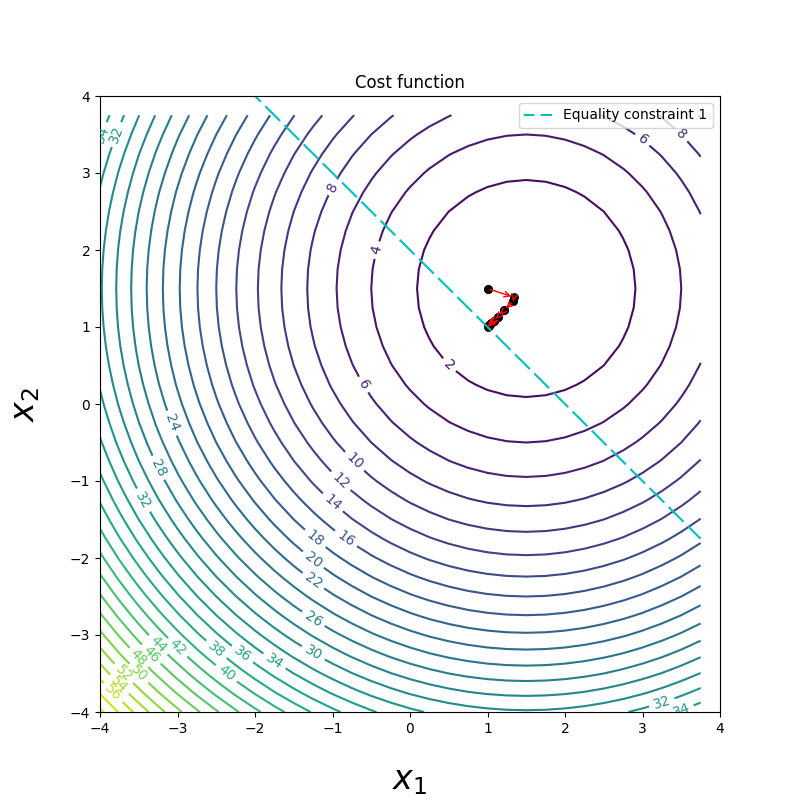

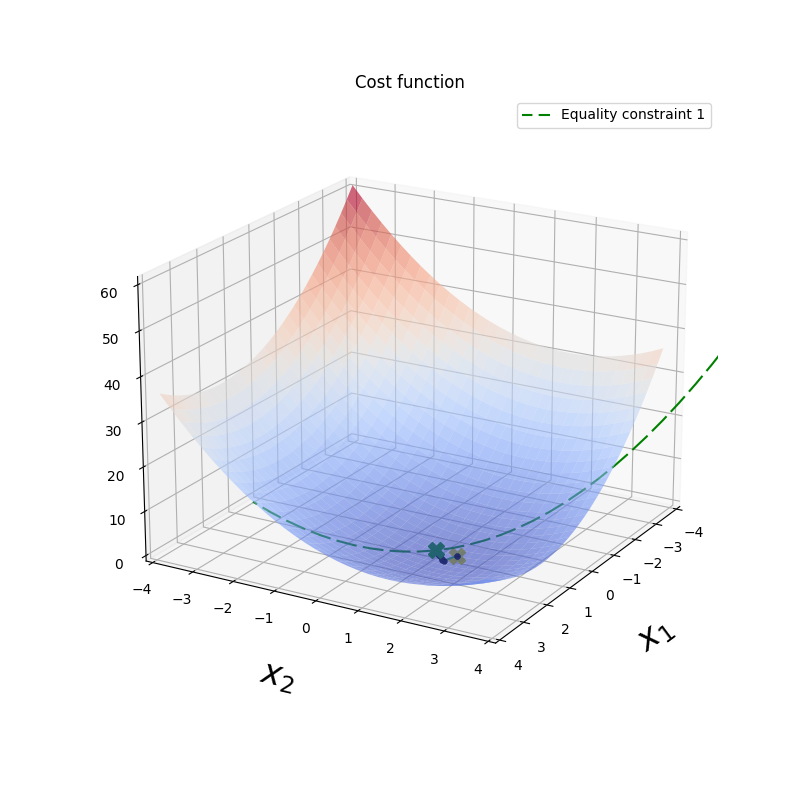

In [16]:
plot_2d_contour(all_x, obj_fun, eq_cons, ineq_cons, plot_h=True, plot_g=True)
plot_3d_surface(all_x, all_f, obj_fun, eq_cons, ineq_cons, plot_h=True, plot_g=True)